In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn
dfCR=pd.read_csv("../input/conversionRates.csv")#To read conversionRates.csv
dfFFR=pd.read_csv("../input/freeformResponses.csv", dtype=object,encoding='latin-1')#To read freeformResponses.csv
dfMCR=pd.read_csv("../input/multipleChoiceResponses.csv", dtype=object,encoding='latin-1')#To read multipleChoiceResponses.csv
dfS=pd.read_csv("../input/schema.csv", dtype=object,encoding='latin-1')#To read schema.csv
readtxt=pd.read_csv("../input/RespondentTypeREADME.txt",sep="\t")

In [3]:
print(dfCR.head())
print(dfCR.shape)
print(dfCR.describe())

In [4]:
dfCR.apply(lambda x : sum(x.isnull()),axis=0)

In [5]:
var = dfCR.groupby(['originCountry']).exchangeRate.sum()
var.plot(kind='bar',stacked=False, grid=False, figsize =(20,5))

In [6]:
print(dfFFR.head())
print(dfFFR.shape)
print(dfFFR.describe())

In [7]:
dfFFR.apply(lambda x : sum(x.isnull()),axis=0)

In [8]:
print(dfMCR.head())
print(dfMCR.shape)

In [9]:
print(dfS.head())
print(dfS.shape)
print(dfS.describe())

In [10]:
print(readtxt.head())
print(readtxt.shape)
print(readtxt.describe())

In [11]:
print(dfMCR.describe())
dfMCR.isnull().values.sum()

In [12]:
 dfMCR.apply(lambda x : sum(x.isnull()),axis=0)

In [13]:
dfMCR['EmploymentStatus'].value_counts()

In [14]:
dfMCR['StudentStatus'].value_counts()

In [15]:
frac = len(dfMCR) * 0.8
d = dfMCR.dropna(thresh=frac, axis=1)
d

In [16]:
d.describe()

In [18]:
d = d.apply(lambda x:x.fillna(x.value_counts().index[0]))
d.astype(str)

In [19]:
print(d.shape)
d.info()

In [20]:
d.EmploymentStatus.unique()

In [21]:
sns.boxplot(data=d)

In [22]:
ax = d.groupby("EmploymentStatus").size().plot(kind="bar", figsize=(4, 4))

In [23]:
sns.countplot(x='GenderSelect', data=d )

In [24]:
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
d['GenderSelect']=number.fit_transform(d['GenderSelect'].astype('str'))
d['Country']=number.fit_transform(d['Country'].astype('str'))
d['Tenure']=number.fit_transform(d['Tenure'].astype('str'))
d['FirstTrainingSelect']=number.fit_transform(d['FirstTrainingSelect'].astype('str'))
d['EmploymentStatus']=number.fit_transform(d['EmploymentStatus'].astype('str'))
d['PastJobTitlesSelect']=number.fit_transform(d['PastJobTitlesSelect'].astype('str'))
d['FormalEducation']=number.fit_transform(d['FormalEducation'].astype('str'))

y=d['EmploymentStatus']
X=d.drop(['EmploymentStatus'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model1 = gnb.fit(X_train, Y_train)
print(model1)
model1 = gnb.score(X_train, Y_train)
print(model1)
preds = gnb.predict(X_test)
print(preds)
print(accuracy_score(Y_test, preds))


In [25]:
y = d['EmploymentStatus']
X = d.drop(['EmploymentStatus'],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# Load library
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
# Building Decision Tree - CART Algorithm (gini criteria)
treee = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=4)
# Train
model2 = treee.fit(X_train, Y_train)
print(model2)
model2=treee.score(X_train, Y_train)
print(model2)
preds = treee.predict(X_test)
print(preds)
print(accuracy_score(Y_test, preds))

In [41]:

with open("treee.txt", "w") as f:
    f = tree.export_graphviz(treee, out_file=f)

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(treee, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


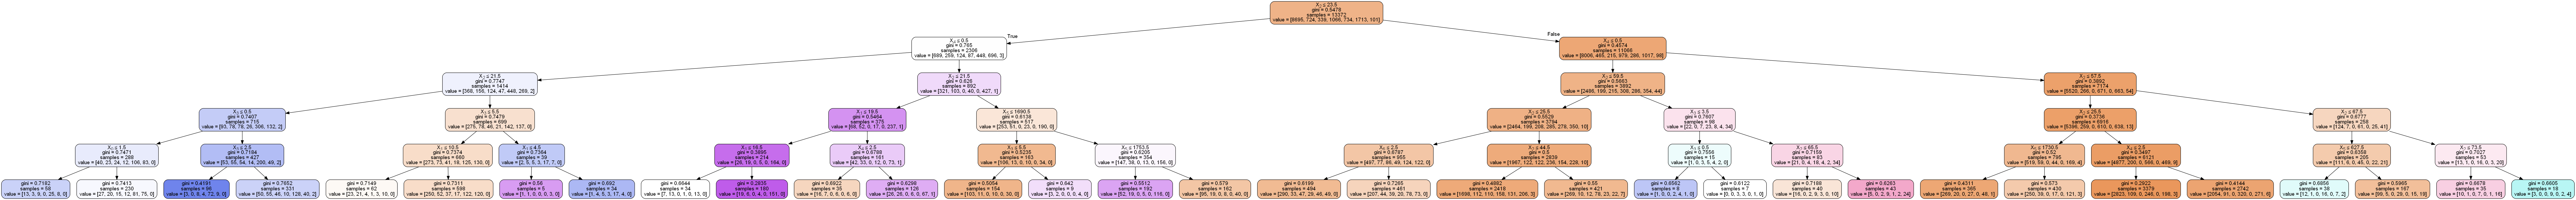

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Knn = KNeighborsClassifier(n_neighbors=5)
model3 = Knn.fit(X_train, Y_train)
print(model3)
model3 = Knn.score(X_train, Y_train)
print(model3)
preds=Knn.predict(X_test)
print(preds)
print(accuracy_score(Y_test, preds))
y2=np.array(Y_test)
y2

In [44]:
from sklearn import svm
supp = svm.SVC()
model4 = supp.fit(X_train, Y_train)
print(model4)
model4 = supp.score(X_train, Y_train)
print(model4)
#Predict Output
preds = supp.predict(X_test)
print(preds)
print(accuracy_score(Y_test, preds))


In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model5 = lr.fit(X_train, Y_train)
print(model5)
model5 = lr.score(X_train, Y_train)
print(model5)

#Equation coefficient and Intercept
print('Coefficient: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)
#Predict Output
preds = lr.predict(X_test)
print(preds)
print(accuracy_score(Y_test, preds))

In [46]:
Country_wise = pd.crosstab(index=dfMCR["Country"], 
                          columns=dfMCR["EmploymentStatus"])

Country_wise.plot(kind="bar", figsize=(16,8), stacked=True)

In [47]:
import matplotlib.pyplot as plt
plt.scatter
g = sns.FacetGrid(d, col= "Tenure", hue="GenderSelect")
g.map(plt.scatter, "EmploymentStatus", "FirstTrainingSelect", alpha=.9)
g.add_legend();

In [48]:
g = sns.FacetGrid(d, col="Tenure", size=6, aspect=.9)
g.map(sns.barplot, "GenderSelect", "EmploymentStatus");

In [49]:
g = sns.FacetGrid(d, col="GenderSelect", size=12, aspect=.9)
g.map(sns.barplot, "Age", "EmploymentStatus");

In [50]:
g = sns.FacetGrid(d, col="GenderSelect", size=4, aspect=.9)
g.map(sns.barplot, "Country", "EmploymentStatus");

In [51]:
g = sns.FacetGrid(d, col="Country", col_wrap=4, size=2, ylim=(0, 52))
g.map(sns.pointplot, "EmploymentStatus", "Tenure", color=".3", ci=None);